# CSCI250 Project 2 - Malek and Raneem

### Heart Failure Analysis

### Research Question: Can we predict heart failure through age, smoking, hypertension, and diabetes history? (Common narrative)

### Research Question: Can we predict heart failure through the variables we think are important too? (Unpopular opinion)

Dataset: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

> Loading Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from lifelines import KaplanMeierFitter
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

> Loading the Dataset

In [2]:
df = pd.read_csv('heartFailure.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


to keep the integrity of the dataset moving forward, we decided to copy it.

In [3]:
data = df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

> Exploring the Dataset

<AxesSubplot: >

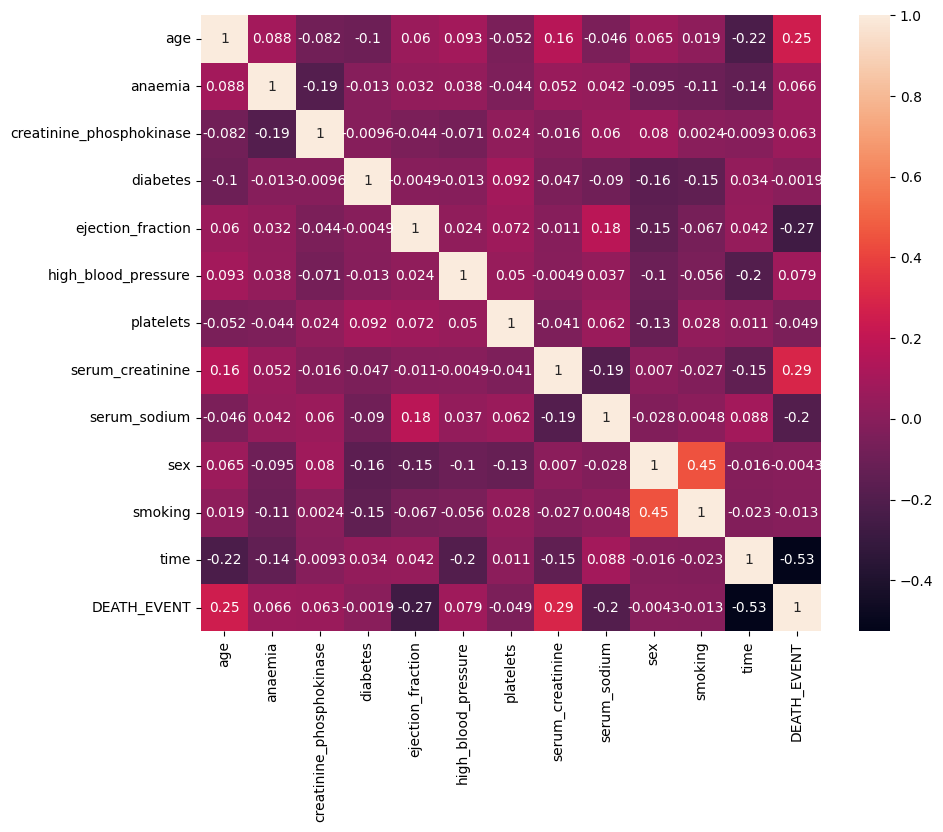

In [6]:
#correlational heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, ax=ax)

Histogram of Age Distribution in the dataset

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Age Distribution')]

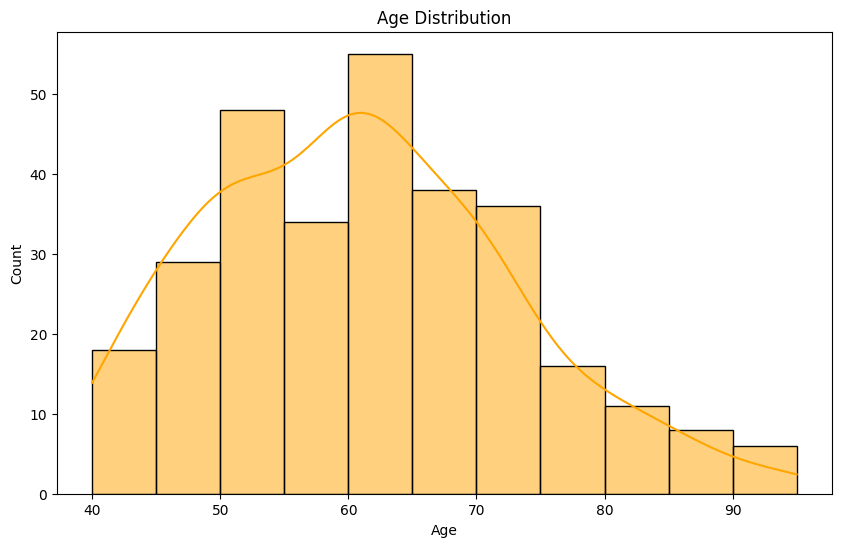

In [7]:

age = data['age']
plt.figure(figsize=(10,6))
ax = sns.histplot(data=age, binwidth=5, kde=True, color='orange')
ax.set(xlabel='Age', ylabel='Count', title='Age Distribution')

Boxplot of ages grouped by sex

Text(0, 0.5, 'Sex')

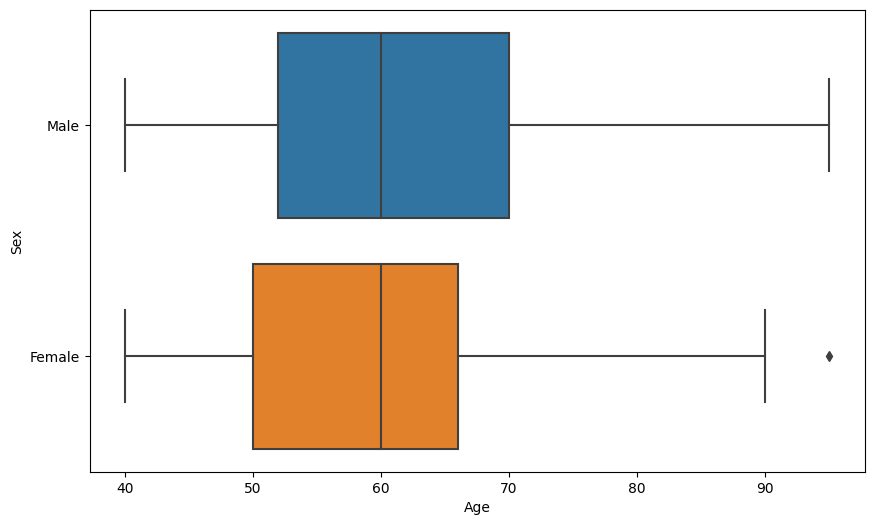

In [8]:
plt.figure(figsize=(10,6))

sns.boxplot(y=data['sex'].replace({0: 'Female', 1: 'Male'}), x='age', data=data, orient='h')

plt.xlabel('Age')
plt.ylabel('Sex')

Pie chart of survival distribution

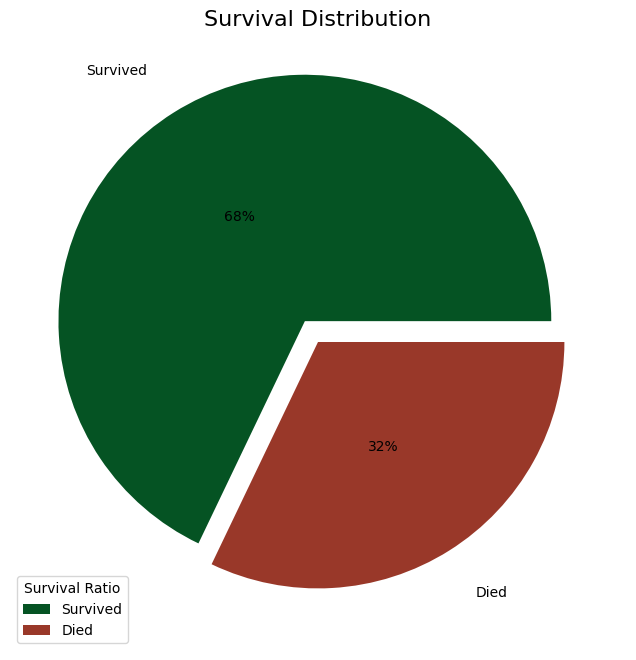

In [9]:
plt.figure(figsize=(10,8))

DEATH_EVENT_counts = data['DEATH_EVENT'].value_counts()
labels = ['Survived', 'Died']
colors = ['#055323', '#993829']

plt.pie(DEATH_EVENT_counts, labels=labels, colors=colors, autopct='%1.0f%%',
        pctdistance=0.5, labeldistance=1.2, explode=[0.1, 0])
plt.title('Survival Distribution', fontsize=16)

plt.legend(title='Survival Ratio', loc=0)

Kaplan-Meier Estimate of the Effect of Time on Survival Probability

Text(0.5, 1.0, 'Kaplan-Meier Estimate for Death Event and Follow-up Period')

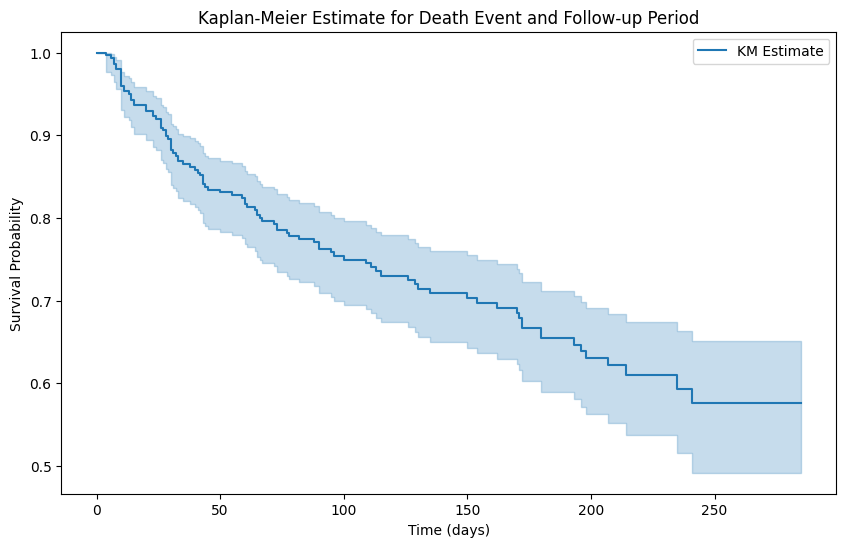

In [10]:
plt.figure(figsize=(10,6))

# Create a KaplanMeierFitter object and fit the data
kmf = KaplanMeierFitter()
kmf.fit(data['time'], event_observed=data['DEATH_EVENT'])

# Plot the Kaplan-Meier curve
kmf.plot(label='KM Estimate')

# Set the axis labels and title
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Estimate for Death Event and Follow-up Period')


Survival Frequency Based on Age  

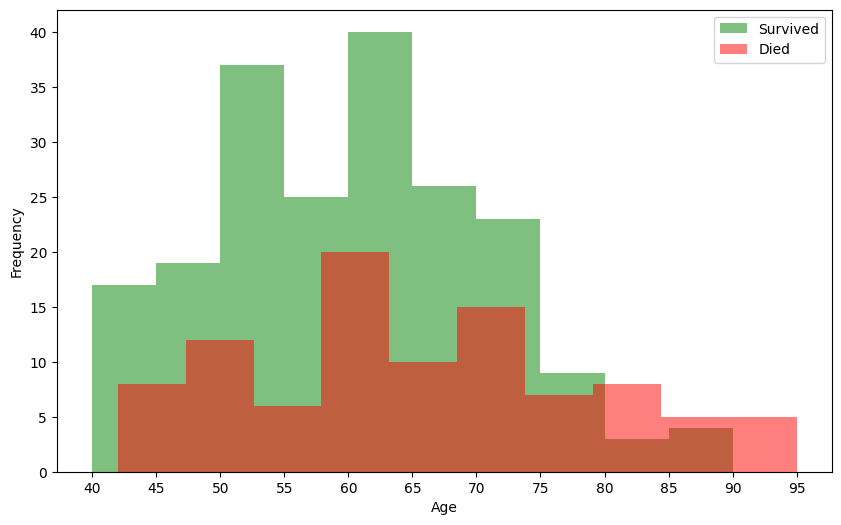

In [11]:
plt.figure(figsize=(10,6))

survived_ages = data.loc[data['DEATH_EVENT'] == 0, 'age']
died_ages = data.loc[data['DEATH_EVENT'] == 1, 'age']

plt.hist(survived_ages, bins=10, alpha=0.5, color='green', label='Survived')
plt.hist(died_ages, bins=10, alpha=0.5, color='red', label='Died')
plt.xticks(np.arange(40, 100, 5))

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()



Pie chart of smoking distribution

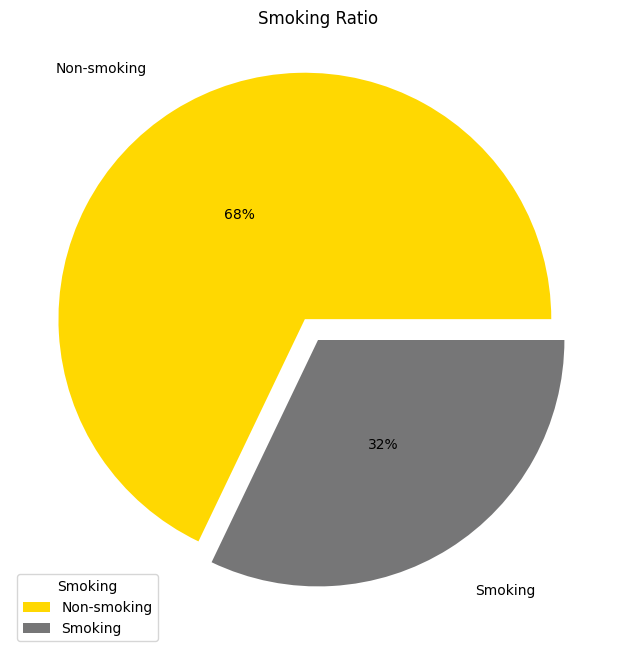

In [12]:
smoking_counts = data['smoking'].value_counts()

labels = ['Non-smoking', 'Smoking']
colors = ['#FFD801', '#767677']

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(smoking_counts, labels=labels, colors=colors, explode=[0.1, 0],
       autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
ax.set_title('Smoking Ratio')

ax.legend(title='Smoking', loc=0)

Text(0.5, 1.0, 'Effect of Smoking on Death')

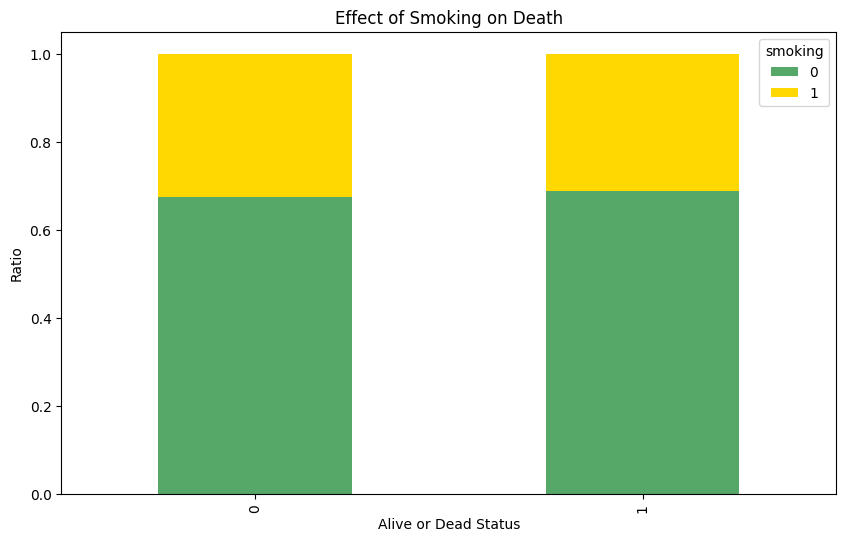

In [13]:
smoke_death = pd.crosstab(data['DEATH_EVENT'], data['smoking'])
smoke_death_norm = smoke_death.div(smoke_death.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

smoke_death_norm.plot(kind='bar', stacked=True, color=['#55A868', '#FFD801'], ax=ax)

ax.set_xlabel('Alive or Dead Status')
ax.set_ylabel('Ratio')
ax.set_title('Effect of Smoking on Death')




Normal levels of the various variables: 

Creatinine phosphokinase (CPK): 10 to 120 mcg/L) 

Ejection fraction (% blood pumped out of the heart): 50% or higher 

Platelets: 150,000 to 450,000 cells/microliter

 Serum creatinine:  0.7 to 1.3 mg/dL for men  
                               0.6 to 1.1 mg/dL for women 

Serum sodium: 136 to 145 (mmol/L)

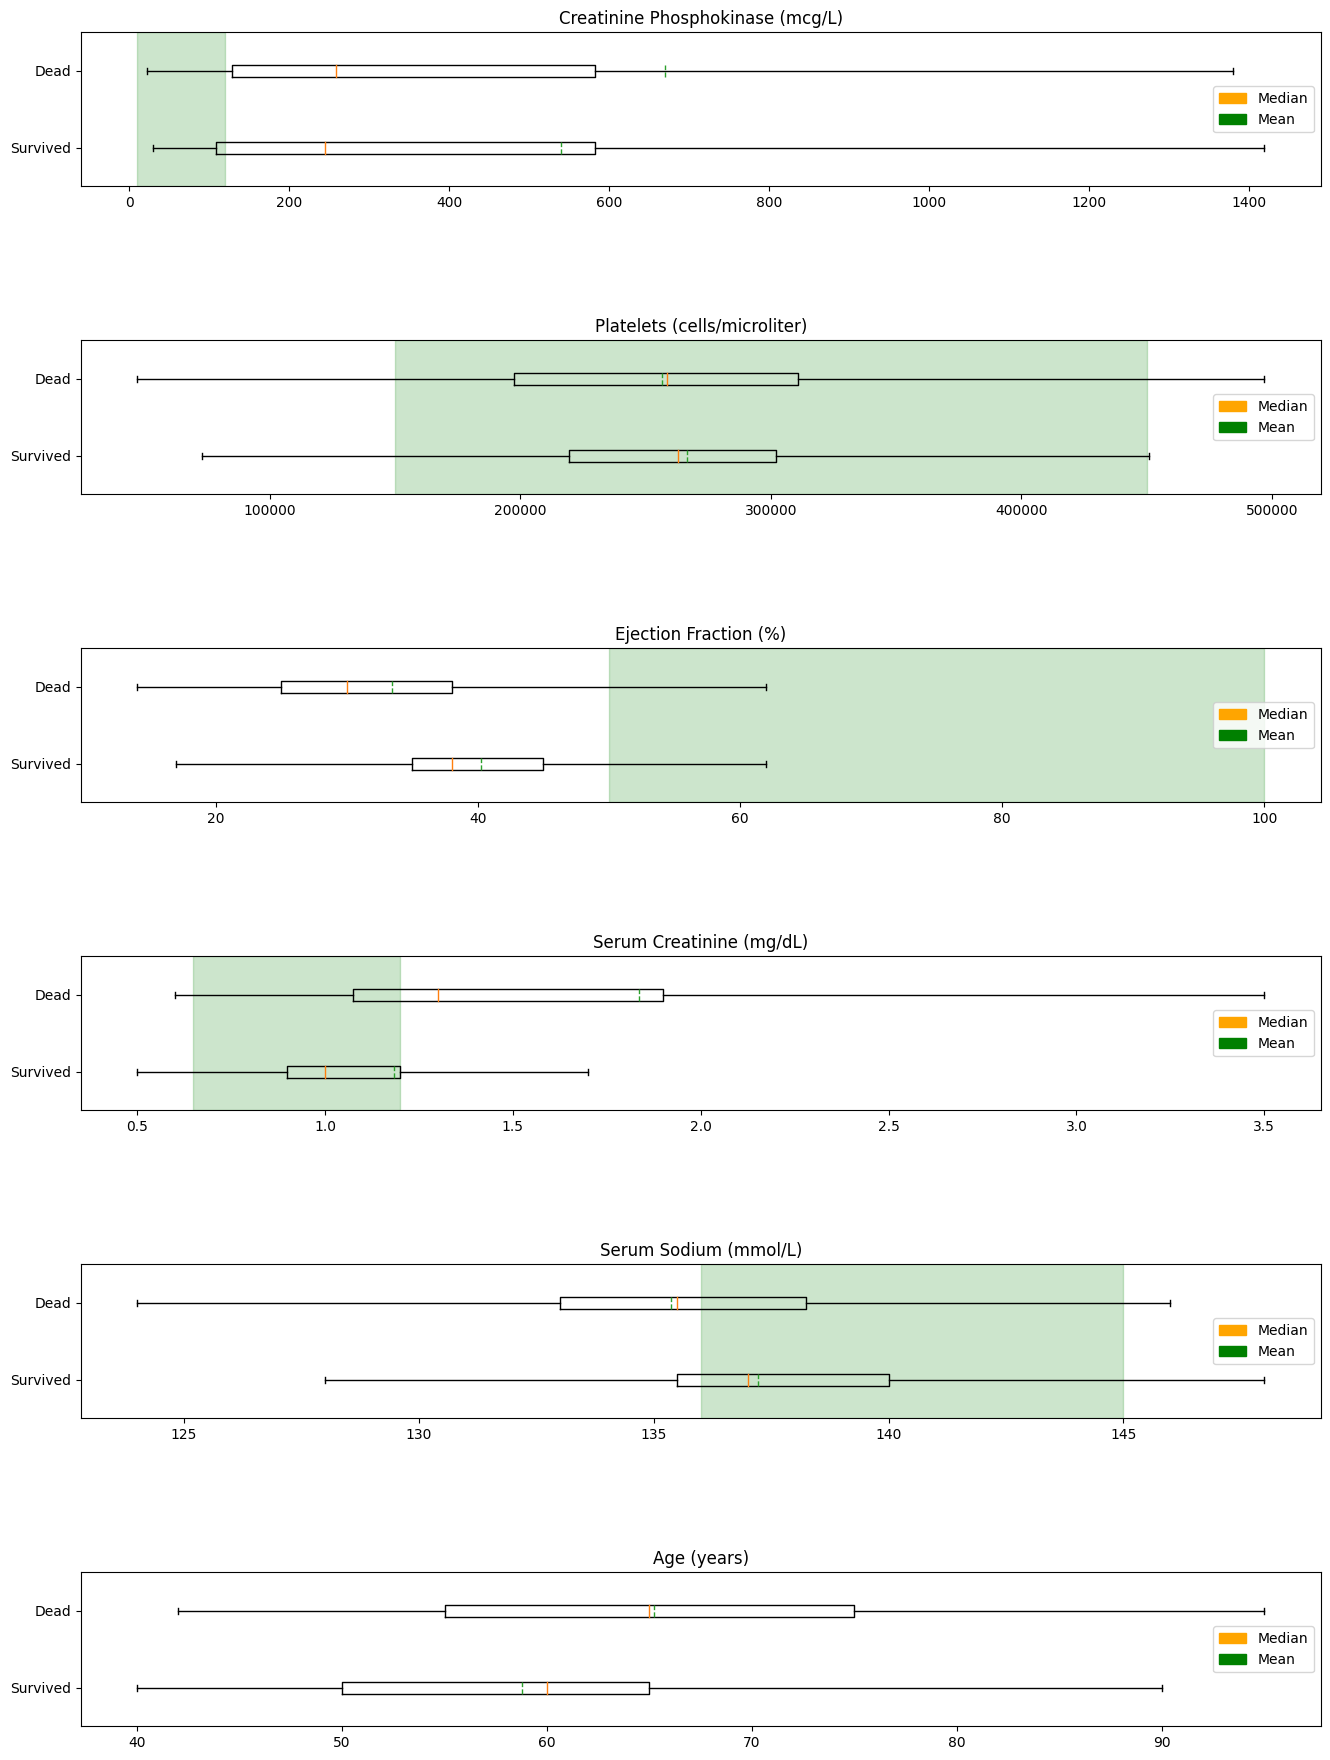

In [14]:
survived = data[data['DEATH_EVENT'] == 0]
died = data[data['DEATH_EVENT'] == 1]

variables = [survived['creatinine_phosphokinase'], died['creatinine_phosphokinase'], survived['platelets'], died['platelets'], survived['ejection_fraction'], died['ejection_fraction'], survived['serum_creatinine'], died['serum_creatinine'], survived['serum_sodium'], died['serum_sodium'], survived['age'], died['age']]
names = ['Creatinine Phosphokinase (mcg/L)', 'Platelets (cells/microliter)', 'Ejection Fraction (%)', 'Serum Creatinine (mg/dL)', 'Serum Sodium (mmol/L)', 'Age (years)']

ref_ranges = [(10, 120), (150000, 450000), (50, 100), (0.65, 1.2), (136, 145)]

# Set the figure size and adjust the layout
fig = plt.figure(figsize=(16, 22))
fig.subplots_adjust(hspace=1)

# Iterate over the variables and create a separate boxplot for each one
for i in range(len(variables)//2):
    ax = fig.add_subplot(6, 1, i+1)
    ax.boxplot([variables[2*i], variables[2*i+1]], whis=2, vert=False, showfliers=False,
               showmeans=True, meanline=True, labels=['Survived', 'Dead'])
    # ax.set_yticklabels(["Dead", "Alive"])
    ax.set_title(names[i])
    if i != 5:
        ax.axvspan(ref_ranges[i][0], ref_ranges[i][1], alpha=0.2, color='green')

    # Create the legend for the median and mean
    median_patch = mpatches.Patch(color = "orange", label='Median')
    mean_patch = mpatches.Patch(color = "g", label='Mean')
    plt.legend(handles=[median_patch, mean_patch, ], loc=7)



> Machine Learning

#### Selecting $x$ and $y$ variables to feed into the model

In [15]:
data = shuffle(data)
data.reset_index(inplace=True, drop = True)

In [16]:
y = data.pop('DEATH_EVENT')

# Version 1: Common Approach
x = data[['smoking','high_blood_pressure','diabetes', 'age']]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=2)

# Version 2: Our method -- unpopular opinion
x2 = data[['ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'sex', 'time']]
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2, y, test_size=0.3, random_state=2)

#Version 3: All together 
x3 = data
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y, test_size=0.3, random_state=2)

### Version 1 - Common Approach

### Random Forest Model

In [17]:
RFmodel = RandomForestClassifier()
RFmodel.fit(x_train,y_train)
RFmodel_pred=RFmodel.predict(x_test)
RFmodel_acc = accuracy_score(y_test, RFmodel_pred)
RFmodel_acc

0.5888888888888889

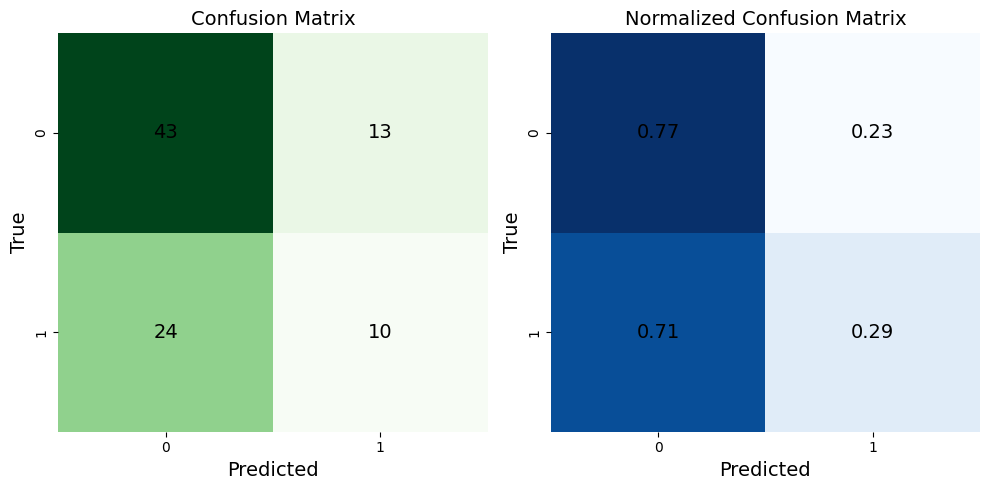

In [18]:
labels = np.unique(y)

# Compute the confusion matrix and normalized confusion matrix
cm = confusion_matrix(y_test, RFmodel_pred, labels=labels)
cm_norm = confusion_matrix(y_test, RFmodel_pred, labels=labels, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens',
            xticklabels=labels, yticklabels=labels, fmt='d',
            cbar=False, ax=axs[0], annot_kws={"fontsize":14, "color":"black"})
axs[0].set_xlabel('Predicted', fontsize=14)
axs[0].set_ylabel('True', fontsize=14)
axs[0].set_title('Confusion Matrix', fontsize=14)

# Plot the normalized confusion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues',
            xticklabels=labels, yticklabels=labels, fmt='.2f',
            cbar=False, ax=axs[1], annot_kws={"fontsize":14, "color":"black"})
axs[1].set_xlabel('Predicted', fontsize=14)
axs[1].set_ylabel('True', fontsize=14)
axs[1].set_title('Normalized Confusion Matrix', fontsize=14)

plt.tight_layout()


### Support Machine Vector Model

In [19]:
SVMmodel = LinearSVC(max_iter=100000000)
SVMmodel.fit(x_train,y_train)
SVMmodel_pred=SVMmodel.predict(x_test)
print(accuracy_score(y_test, SVMmodel_pred))

0.6222222222222222


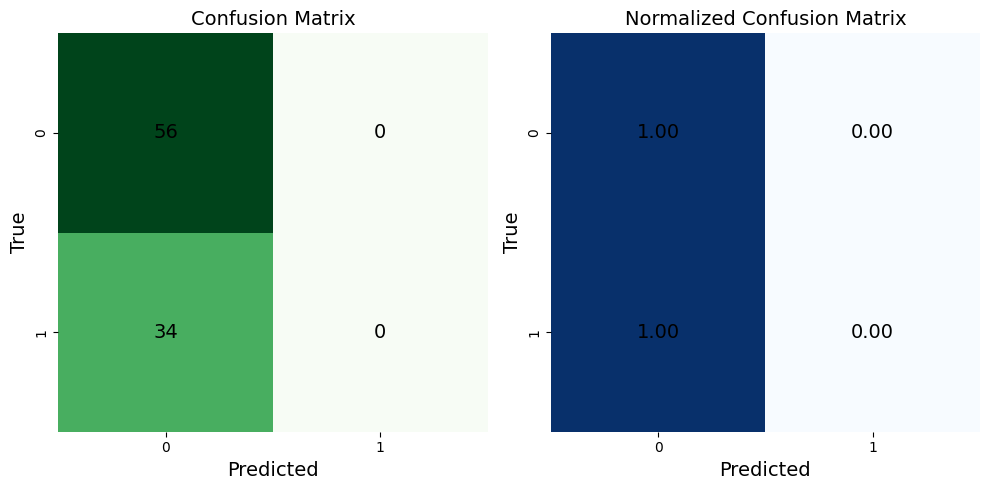

In [20]:
#survived = 0 ,  died = 1
labels = np.unique(y)

# Compute the confusion matrix and normalized confusion matrix
cm = confusion_matrix(y_test, SVMmodel_pred, labels=labels)
cm_norm = confusion_matrix(y_test, SVMmodel_pred, labels=labels, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens',
            xticklabels=labels, yticklabels=labels, fmt='d',
            cbar=False, ax=axs[0], annot_kws={"fontsize":14, "color":"black"})
axs[0].set_xlabel('Predicted', fontsize=14)
axs[0].set_ylabel('True', fontsize=14)
axs[0].set_title('Confusion Matrix', fontsize=14)

# Plot the normalized confusion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues',
            xticklabels=labels, yticklabels=labels, fmt='.2f',
            cbar=False, ax=axs[1], annot_kws={"fontsize":14, "color":"black"})
axs[1].set_xlabel('Predicted', fontsize=14)
axs[1].set_ylabel('True', fontsize=14)
axs[1].set_title('Normalized Confusion Matrix', fontsize=14)

plt.tight_layout()


### Version 2 - Our method: Unpopular opinion

### Random Forest Model

In [21]:
RFmodel.fit(x_train2,y_train2)
RFmodel2_pred = RFmodel.predict(x_test2)
RFmodel2_acc = accuracy_score(y_test2, RFmodel2_pred)
RFmodel2_acc

0.7777777777777778

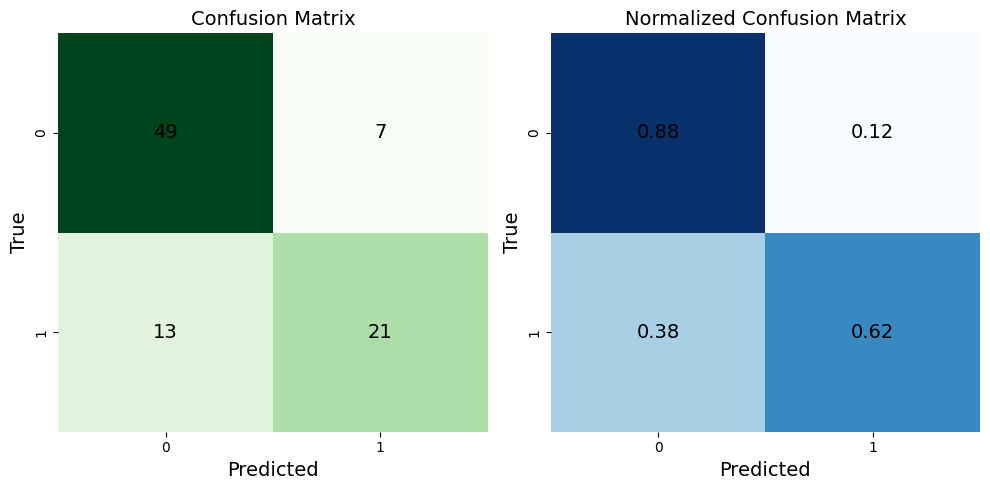

In [22]:
labels = np.unique(y)

# Compute the confusion matrix and normalized confusion matrix
cm = confusion_matrix(y_test2, RFmodel2_pred, labels=labels)
cm_norm = confusion_matrix(y_test2, RFmodel2_pred, labels=labels, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens',
            xticklabels=labels, yticklabels=labels, fmt='d',
            cbar=False, ax=axs[0], annot_kws={"fontsize":14, "color":"black"})
axs[0].set_xlabel('Predicted', fontsize=14)
axs[0].set_ylabel('True', fontsize=14)
axs[0].set_title('Confusion Matrix', fontsize=14)

# Plot the normalized confusion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues',
            xticklabels=labels, yticklabels=labels, fmt='.2f',
            cbar=False, ax=axs[1], annot_kws={"fontsize":14, "color":"black"})
axs[1].set_xlabel('Predicted', fontsize=14)
axs[1].set_ylabel('True', fontsize=14)
axs[1].set_title('Normalized Confusion Matrix', fontsize=14)

plt.tight_layout()


### Support Machine Vector Model

In [23]:
SVMmodel2 = LinearSVC(max_iter=1000000)

SVMmodel2.fit(x_train2,y_train2)
SVMmodel2_pred=SVMmodel2.predict(x_test2)
print(accuracy_score(y_test2, SVMmodel2_pred))

KeyboardInterrupt: 

In [0]:
#survived = 0 ,  died = 1
labels = np.unique(y)

# Compute the confusion matrix and normalized confusion matrix
cm = confusion_matrix(y_test2, SVMmodel2_pred, labels=labels)
cm_norm = confusion_matrix(y_test2, SVMmodel2_pred, labels=labels, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens',
            xticklabels=labels, yticklabels=labels, fmt='d',
            cbar=False, ax=axs[0], annot_kws={"fontsize":14, "color":"black"})
axs[0].set_xlabel('Predicted', fontsize=14)
axs[0].set_ylabel('True', fontsize=14)
axs[0].set_title('Confusion Matrix', fontsize=14)

# Plot the normalized confusion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues',
            xticklabels=labels, yticklabels=labels, fmt='.2f',
            cbar=False, ax=axs[1], annot_kws={"fontsize":14, "color":"black"})
axs[1].set_xlabel('Predicted', fontsize=14)
axs[1].set_ylabel('True', fontsize=14)
axs[1].set_title('Normalized Confusion Matrix', fontsize=14)

plt.tight_layout()


### Version 3 - All variables together

### Random Forest Model 

In [0]:
SVMmodel = LinearSVC(max_iter=100000000)

RFmodel.fit(x_train3,y_train3)
RFmodel3_pred=RFmodel.predict(x_test3)
RFmodel3_acc = accuracy_score(y_test3, RFmodel3_pred)
RFmodel3_acc

In [0]:
#survived = 0 ,  died = 1
labels = np.unique(y)

# Compute the confusion matrix and normalized confusion matrix
cm = confusion_matrix(y_test3, RFmodel3_pred, labels=labels)
cm_norm = confusion_matrix(y_test3, RFmodel3_pred, labels=labels, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens',
            xticklabels=labels, yticklabels=labels, fmt='d',
            cbar=False, ax=axs[0], annot_kws={"fontsize":14, "color":"black"})
axs[0].set_xlabel('Predicted', fontsize=14)
axs[0].set_ylabel('True', fontsize=14)
axs[0].set_title('Confusion Matrix', fontsize=14)

# Plot the normalized confusion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues',
            xticklabels=labels, yticklabels=labels, fmt='.2f',
            cbar=False, ax=axs[1], annot_kws={"fontsize":14, "color":"black"})
axs[1].set_xlabel('Predicted', fontsize=14)
axs[1].set_ylabel('True', fontsize=14)
axs[1].set_title('Normalized Confusion Matrix', fontsize=14)

plt.tight_layout()


### Support Machine Vector Model

In [0]:
SVMmodel.fit(x_train3,y_train3)
SVMmodel3_pred=SVMmodel.predict(x_test3)
print(accuracy_score(y_test3, SVMmodel3_pred))

In [0]:
#survived = 0 ,  died = 1
labels = np.unique(y)

# Compute the confusion matrix and normalized confusion matrix
cm = confusion_matrix(y_test3, SVMmodel3_pred, labels=labels)
cm_norm = confusion_matrix(y_test3, SVMmodel3_pred, labels=labels, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Greens',
            xticklabels=labels, yticklabels=labels, fmt='d',
            cbar=False, ax=axs[0], annot_kws={"fontsize":14, "color":"black"})
axs[0].set_xlabel('Predicted', fontsize=14)
axs[0].set_ylabel('True', fontsize=14)
axs[0].set_title('Confusion Matrix', fontsize=14)

# Plot the normalized confusion matrix
sns.heatmap(cm_norm, annot=True, cmap='Blues',
            xticklabels=labels, yticklabels=labels, fmt='.2f',
            cbar=False, ax=axs[1], annot_kws={"fontsize":14, "color":"black"})
axs[1].set_xlabel('Predicted', fontsize=14)
axs[1].set_ylabel('True', fontsize=14)
axs[1].set_title('Normalized Confusion Matrix', fontsize=14)

plt.tight_layout()


### In summary:
<ol>
    <li>Version 1 results had the least accuracy. 
    <li>Version 2 results were almost identical to version 3 results.
        </ol>
        
    
We think that the dataset has a few issues that led to those findings:<ul>
    <li> The inequal representation of individuals (death event, sex, smoking).
    <li> The size of the dataset was not large enough (~ 300 people).
    <li> Our models may not have been the best at classifying such problem.
        </ul>

Nonetheless, we think that the results for version 2 (our method) are insightful since they provide us with similar accuracy with less parameters and features to process. 

In [0]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train3, y_train3)
    y_pred = rfc.predict(x_test3)
    scores.append(accuracy_score(y_test3, y_pred))

In [0]:
maxs = max(scores)
maxs_idx = scores.index(maxs)


In [0]:
print(f"Accuracy Score: {maxs} with n_estimators: {maxs_idx}")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5df3a806-ee8f-4e70-8a7e-205099f88eef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>